In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
print(df.shape)

(5572, 5)


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

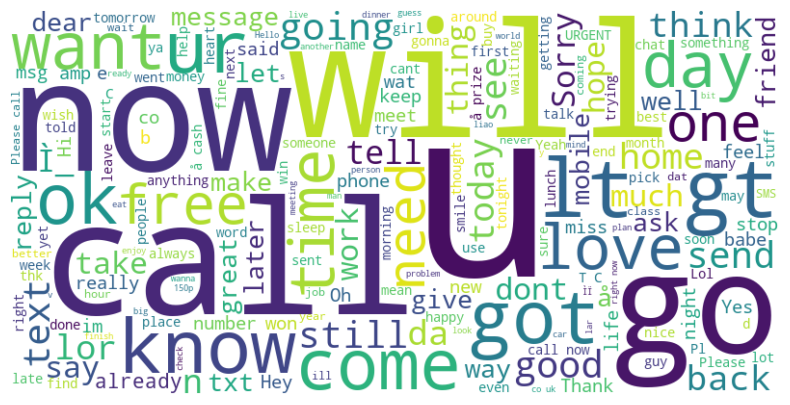

In [6]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(''.join(df.v2))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot: xlabel='v1', ylabel='count'>

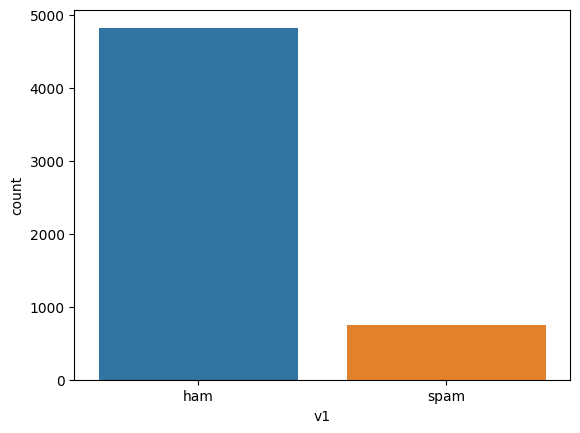

In [7]:
sns.countplot(x = df["v1"], data = df)

In [8]:
df["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [9]:
# It seems that the given dataset is imbalanced.

4825 // 747

6

In [10]:
df['v1'] = df["v1"].map({'spam':1,'ham':0})

In [11]:
from sklearn.utils import resample

# create two different dataframe of majority and minority class 

df_majority = df[(df['v1'] == 0)] 

df_minority = df[(df['v1'] == 1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 
replace = True,    # sample with replacement  
                                 
 n_samples = 4825, # to match majority class     
                                 
 random_state = 42) 

# reproducible results
    
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [12]:
df_upsampled.isnull().sum()

v1    0
v2    0
dtype: int64

In [14]:
# Let's try to convert these text into vectors using bag of words

text = ['Hello my name is james', 'james this is my python notebook', 'james trying to create a big dataset', 'james of words to try differnt', 'features of count vectorizer']

vectorizer = CountVectorizer(stop_words='english')

count_matrix = vectorizer.fit_transform(text)

count_array = count_matrix.toarray()

df1 = pd.DataFrame(data = count_array)

df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,1,0,0,0,0
2,1,0,1,1,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [15]:
# Remove the stop words and transform the texts into the vectorized input variables X

X = vectorizer.fit_transform(df["v2"])

y = df["v1"]

# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.3, random_state=0)

In [16]:
clf = GaussianNB()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8833732057416268